/home/jbane/tritium/Tri_offline/yield/yield_output/xbj/H3_kin1.dat
/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/xbj/H3_kin1.dat
H3_kin1
0         Xbj     Ne     Yield     Error     yield
1  0.178432   5858  0.000431  0.000006  0.000431
2  0.190505  25180  0.001884  0.000015  0.001884
3  0.205698  23573  0.001792  0.000015  0.001792
4  0.221731  18801  0.001451  0.000013  0.001451
5  0.237748  15028  0.001177  0.000011  0.001177
6  0.252628   9624  0.000763  0.000009  0.000763
0         Xbj     Ne    Yield     Error     yield
1  0.178489  10430  1.49849  0.000015  0.001498
2  0.190804  51918  7.12378  0.000031  0.007124
3  0.205961  60736  7.08450  0.000029  0.007085
4  0.221947  58386  5.70282  0.000024  0.005703
5  0.237943  56008  4.61459  0.000019  0.004615
6  0.252597  36632  2.59805  0.000014  0.002598
/home/jbane/tritium/Tri_offline/yield/yield_output/xbj/H3_kin11.dat
/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/xbj/H3_kin11.dat
H3_kin11
1          Xbj

0 H3_kin1
1 H3_kin11
2 H3_kin13


ValueError: scatter requires x column to be numeric

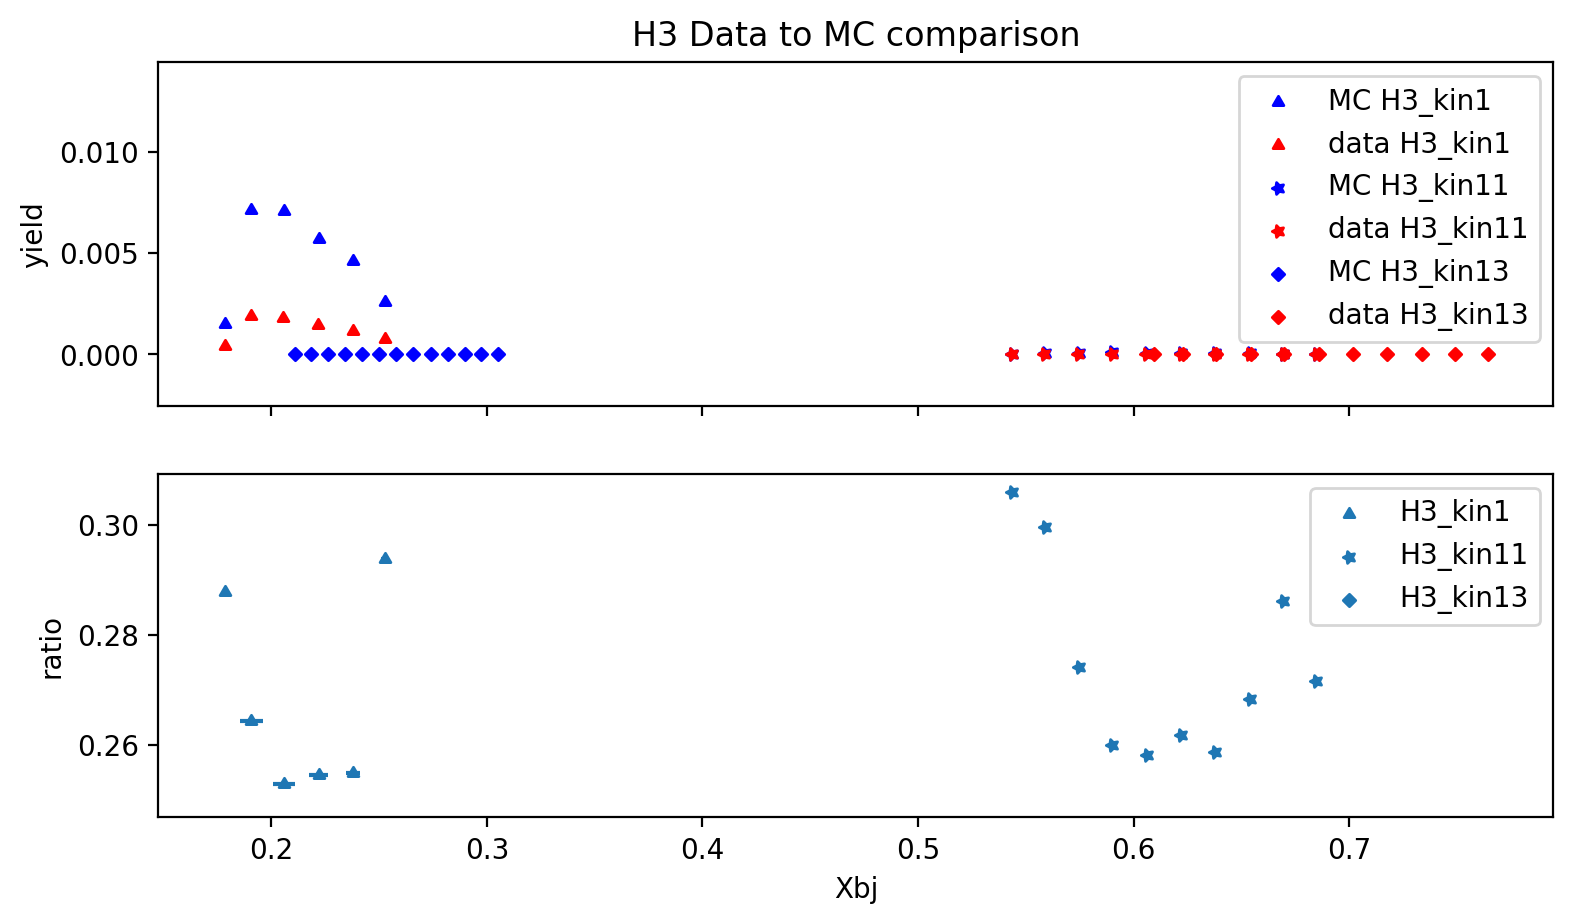

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np



tgt="H3"

Xaxis="Xbj" #theta / Xbj
if Xaxis == "Xbj":
    xaxis="xbj"
else :
    xaxis="theta"

    
#runs=[1207,1233,1279,2570,1344,2632]
#if len(sys.argv) >1:
#    for i in range(1,len(sys.argv),1):
#        runs.append(sys.argv[i])
#else :
#    print('Please enter the runs you want to look at! -1 when done')
#    run=0
#    i=0
#    while run is not -1:
#        i=i+1
#        run=int(input("{}  ".format(i)))
#        if run==-1:
#            break
#        runs.append(run)       
#print( "Will look at runs ", runs)
mcfile='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}/'.format(xaxis)
datafile='/home/jbane/tritium/Tri_offline/yield/yield_output/{}/'.format(xaxis)
kins={}
kin={}

kins=sorted(glob.glob('{}{}*.dat'.format(mcfile,tgt)))

mcDF={}
dataDF={}
mcDFs={}
dataDFs={}
ratios={}
i=0
for i in range(len(kins)):
    kin[i] = kins[i].replace(mcfile,"")
    kin[i] = kin[i].replace('.dat',"")
    if kin[i]== 'D2_kin3':
        break
    #print(kin[i])
    mcfileR=mcfile+'{}.dat'.format(kin[i])
    datafileR=datafile+'{}.dat'.format(kin[i])
    print(datafileR)
    print(mcfileR)
    chk1=0
    chk=0
    if os.path.isfile(mcfileR):
        chk=1
    else:
        ("MC file does not exist") 
        chk=0
    if os.path.isfile(datafileR):
        chk1=1
    else :
        print("Data file does not exist")
        chk1=0
    if chk==0 or chk1==0:
        continue     
    print(kin[i])
        
    mcDF[i]=pd.read_table(mcfileR,delim_whitespace=True)
    dataDF[i]=pd.read_table(datafileR,delim_whitespace=True)
    mcDF[i]['yield']=mcDF[i]['Yield']/1000.0
    mcDF[i]['Error']=mcDF[i]['Error']/1000.0
    
    dataDF[i]['yield']=dataDF[i]['Yield']
    mcmed=mcDF[i]['yield'].mean()
    datamed=dataDF[i]['yield'].mean()
    mcDFs[i]=mcDF[i][mcDF[i]['yield'] >=mcmed *0.5]
    dataDFs[i]=dataDF[i][dataDF[i]['yield'] >= datamed *0.5]
    mcDFs[i]=mcDFs[i].dropna()
    dataDFs[i]=dataDFs[i].dropna()
    #drop the first 2 and last 2 bins
    
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    dl=len(dataDFs[i])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-2])    
    
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
    ml=len(dataDFs[i])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-1])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-2])
    
    
   
    if len(dataDFs[i]) <2 :
            continue
            
                #cut put the edge bins for now
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    last= len(dataDFs[i].index)
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-2])
    
    minind= dataDFs[i].index[0]
    maxind=dataDFs[i].index[len(dataDFs[i].index)-1]
    
   # mcDFs[i]=mcDFs[i][mcDFs[i].index>=minind]
   # mcDFs[i]=mcDFs[i][mcDFs[i].index<=maxind]        
            
    
    print(i, dataDFs[i])
    print(i,mcDFs[i])
    #dataDFs[i]= dataDFs[i].drop(dataDFs[i].index[[0,len(dataDFs[i])-1]])
    #mcDFs[i]=     mcDFs[i].drop(mcDFs[i].index[  [0,  len(mcDFs[i])-1]])
    dataDFs[i]['Stat_err']=1.0/np.sqrt((dataDFs[i]['Ne']))*dataDFs[i]['yield']*10
    ratios[i] = mcDFs[i].copy()
    #ratios[i].drop('yield')
    ratios[i]['data_Y'] =dataDFs[i]['yield']
    ratios[i]['MC_Y'] = mcDFs[i]['yield']
    ratios[i]['ratio'] = dataDFs[i]['yield']/mcDFs[i]['yield']
    ratios[i]['offset'] = dataDFs[i]['yield'] - mcDFs[i]['yield']
 
    i=i+1
    
import matplotlib._color_data as mcd
overlap = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]

markers =[[3,0,0]  ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0] ,[4,1,0],[3,0,0]]
markers2 =[[3,0,0] ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,70],[4,1,0],[3,0,0]]
colors=['red', 'Green', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta','Teal','Brown','Maroon','Mint','Navy']#, f032e6, bcf60c, fabebe, 008080, e6beff, 9A6324, fffac8, 800000, aaffc3, 808000, ffd8b1, 000075, a9a9a9, ffffff, 000000]
fig= plt.figure(dpi=200,figsize=(9,5))
ax=fig.add_subplot(2,1,1)
plt.title('{} Data to MC comparison'.format(tgt))
bx=fig.add_subplot(2,1,2, sharex=ax)

#fig,bx=plt.subplots(dpi=250)
k=int(0)
for j in range(len(mcDF)):
    xkcd = mcd.XKCD_COLORS["xkcd:" + overlap[j]].upper()
    xkcd2 = mcd.XKCD_COLORS["xkcd:" + overlap[j+len(mcDF)]].upper()
    #print(j , kin[j])
    #print()
    if k == 7:
        k = 0
    if(len(dataDFs[j])) == 0:
        continue
    #if j == 110:
     #   ax = mcDFs[j].plot(x='theta',y='yield',yerr=':error',kind='scatter', marker=markers[j], color='blue', label='MC run{}'.format(runs[j]))
    #else :
    mcDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Error',kind='scatter',marker=markers[j], color='blue', label='MC {}'.format(kin[j]))
    
    dataDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',kind='scatter', marker=markers2[j], color='red', label='data {}'.format(kin[j]))
    ratios[j].plot(ax=bx,x='{}'.format(Xaxis) ,y='ratio', xerr='offset', kind='scatter', label='{}'.format(kin[j]),marker=markers2[j] )
    k=k+1
    print(j , kin[j])    
ax.set_yscale("log")
ax.grid(True)
bx.grid(True)
ax.legend(ncol=2)
#bx.legend(ncol=2)

fig.subplots_adjust(hspace=0)
fig.savefig('images/{}_all.png'.format(tgt))


In [12]:
dataDFs[0]

,theta,Ne,Yield,Error,yield,Stat_err
6,16.4740,17083,0.001809,0.061263,0.001809,0.000138
7,16.7009,15905,0.001681,0.063526,0.001681,0.000133
8,16.9284,15258,0.001614,0.064841,0.001614,0.000131
9,17.1549,13935,0.001473,0.067868,0.001473,0.000125
10,17.3813,13238,0.001398,0.069642,0.001398,0.000122
11,17.6098,12210,0.001290,0.072507,0.001290,0.000117
12,17.8365,11606,0.001228,0.074350,0.001228,0.000114
13,18.0638,10812,0.001143,0.077024,0.001143,0.000110
14,18.2897,10124,0.001069,0.079637,0.001069,0.000106
15,18.5158,9437,0.000998,0.082454,0.000998,0.000103


In [10]:
kins\

<generator object _iglob at 0x7f7f6d1c53b8>

In [58]:
runDF= pd.read_table('./yield_output/byrun/1282.dat', delim_whitespace=True)

fullDF=pd.read_table('./yield_output/theta/He3_kin3.dat',delim_whitespace=True)




In [64]:
runDF=runDF.dropna()
fullDF=fullDF.dropna()

In [65]:
runDF

,theta,:Ne,yield,:error
2,18.5795,5,0.000001,5.293280e-07
3,19.2148,4045,0.001278,2.009660e-05
4,19.9017,8849,0.002386,2.536070e-05
5,20.7751,8933,0.001886,1.994970e-05
6,21.6099,7972,0.001330,1.489340e-05
7,22.2322,1229,0.000161,4.602590e-06


In [66]:
fullDF

,theta,Ne,Yield,Error
2,18.5821,36,0.004008,0.000001
3,19.2180,39383,5.170960,0.001609
4,19.9051,86102,9.676050,0.002557
5,20.7756,85768,7.578370,0.001562
6,21.6107,78546,5.477780,0.000886
7,22.2379,11878,0.653709,0.000082


In [70]:
rat=fullDF.copy()
rat['ratio']=runDF['yield']/fullDF['Yield']

In [72]:
rat['ratio']=rat['ratio']*1000

In [73]:
rat

,theta,Ne,Yield,Error,ratio
2,18.5821,36,0.004008,0.000001,0.295293
3,19.2180,39383,5.170960,0.001609,0.247178
4,19.9051,86102,9.676050,0.002557,0.246553
5,20.7756,85768,7.578370,0.001562,0.248805
6,21.6107,78546,5.477780,0.000886,0.242757
7,22.2379,11878,0.653709,0.000082,0.246828
